# Exploration of Transshipment Data, Take Two



In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from matplotlib import colors,colorbar
import pandas as pd
import math
from datetime import datetime

In [2]:
# Potential Transshipments
df = pd.DataFrame.from_csv('GFW_transshipment_data_20170222/potential_transshipments_20170222.csv')

In [3]:
df.head()

,latitude,longitude,event_start_time,duration_hrs,flag_iso3
mmsi,,,,,
311296000,27.156422,-52.223976,2014-03-04 00:00:15 UTC,11.762778,BHS
311296000,45.204567,-19.603624,2014-01-17 15:35:18 UTC,9.575278,BHS
311296000,29.027460,-49.028973,2015-05-04 12:11:15 UTC,12.350833,BHS
311296000,19.308685,-64.971237,2016-01-16 07:45:06 UTC,8.321111,BHS
311296000,27.156422,-52.223976,2014-03-04 00:00:15 UTC,11.762778,BHS


In [4]:
min_lat = -85
max_lat = 85
min_lon = -180
max_lon = 180

firstlon, lastlat, lastlon, firstlat = min_lon,min_lat,max_lon,max_lat

one_over_cellsize = 1
cellsize = 1

numlats = int((max_lat-min_lat)*one_over_cellsize)
numlons = int((max_lon-min_lon)*one_over_cellsize)

In [5]:
numdays = (365*5+1) # number of days, 4 years, one leap year
d0 = datetime(2012,1,1)

In [6]:
grid = np.zeros(shape=(numlats,numdays))

# There are more efficient ways to do this
for index, row in df.iterrows():
    lat = int(math.floor(row['latitude']*one_over_cellsize))
    d = row['event_start_time']
    d = datetime.strptime(d,"%Y-%m-%d %H:%M:%S UTC")
    day_index = (d - d0).days
    lat_index = lat-min_lat*one_over_cellsize 
    try:
        grid[lat_index][day_index] += row['duration_hrs']#/770
    except:
        pass

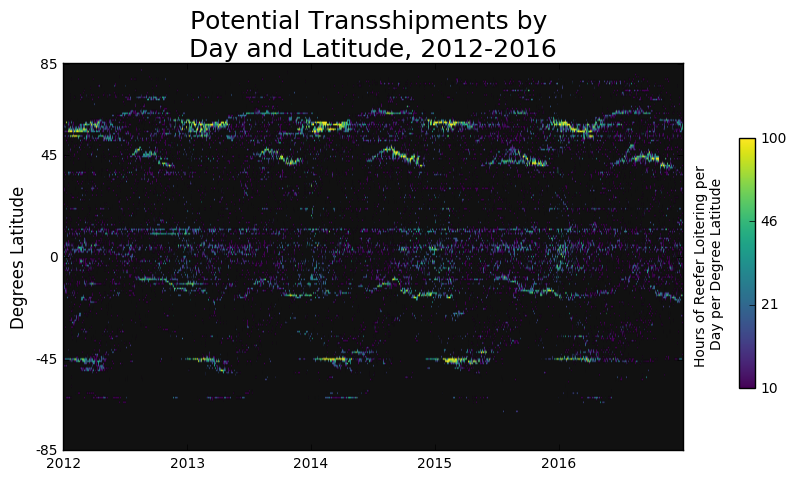

In [7]:
plt.rcParams["figure.figsize"] = [8,5]

vmin = 10
vmax = 100
fig = plt.figure()

ax = plt.subplot()
ax.set_axis_bgcolor('#111111')
plt.imshow(np.flipud(grid),vmin=vmin, vmax=vmax, 
           norm = colors.LogNorm(vmin=vmin, vmax=vmax), aspect='auto',
          cmap = plt.get_cmap('viridis'))
plt.title("Potential Transshipments by \nDay and Latitude, 2012-2016", fontsize=18 )
plt.ylabel('Degrees Latitude',fontsize = 12)

lats = [85,45,0,-45,-85]
labels = [int(i) for i in lats]
y = [0,45-5,90-5,135-5,170]
plt.yticks(y, labels)


years = [2012,2013,2014,2015, 2016,2017]
labels = [int(i) for i in years]
x = [i*365 for i in range(5)]
plt.xticks(x, labels)



ax = fig.add_axes([.97, 0.25, 0.02, 0.50]) #x coordinate , 
norm = colors.LogNorm(vmin=vmin, vmax=vmax)
lvls = np.logspace(np.log10(vmin),np.log10(vmax),num=4)
cb = colorbar.ColorbarBase(ax,norm = norm, orientation='vertical',
                           ticks=lvls, cmap = plt.get_cmap('viridis'))
cb.ax.set_yticklabels([int(i) for i in lvls], fontsize=10, color = "#000000")
cb.set_label('Hours of Reefer Loitering per \nDay per Degree Latitude',labelpad=-67, y=0.5, color = "#000000")
plt.savefig('trans_effort_by_lat.png',bbox_inches='tight',dpi=300,pad_inches=0)
plt.show()

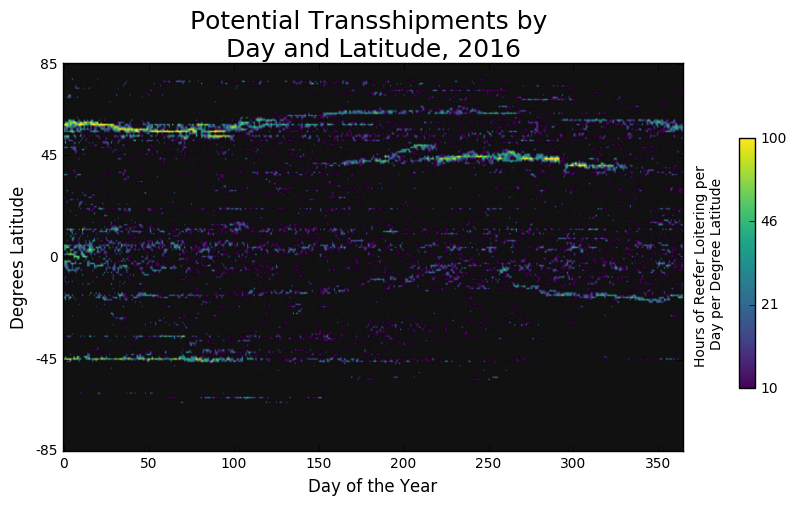

In [8]:
plt.rcParams["figure.figsize"] = [8,5]

vmin = 10
vmax = 100
fig = plt.figure()

ax = plt.subplot()
ax.set_axis_bgcolor('#111111')
#np.flipud(np.transpose(effort))
plt.imshow(np.flipud(grid[:,-365:]),vmin=vmin, vmax=vmax, 
           norm = colors.LogNorm(vmin=vmin, vmax=vmax), aspect='auto',
          cmap = plt.get_cmap('viridis'))
plt.title("Potential Transshipments by \nDay and Latitude, 2016", fontsize=18 )
plt.ylabel('Degrees Latitude',fontsize = 12)
plt.xlabel('Day of the Year', fontsize = 12)

# plt.plot(x, y, 'ro')
# You can specify a rotation for the tick labels in degrees or with keywords.
lats = [85,45,0,-45,-85]
labels = [int(i) for i in lats]
y = [0,45-5,90-5,135-5,170]
plt.yticks(y, labels)



ax = fig.add_axes([.97, 0.25, 0.02, 0.50]) #x coordinate , 
norm = colors.LogNorm(vmin=vmin, vmax=vmax)
lvls = np.logspace(np.log10(vmin),np.log10(vmax),num=4)
cb = colorbar.ColorbarBase(ax,norm = norm, orientation='vertical',
                           ticks=lvls, cmap = plt.get_cmap('viridis'))
cb.ax.set_yticklabels([int(i) for i in lvls], fontsize=10, color = "#000000")
cb.set_label('Hours of Reefer Loitering per \nDay per Degree Latitude',labelpad=-67, y=0.5, color = "#000000")
plt.savefig('trans_effort_by_lat_2016.png',bbox_inches='tight',dpi=300,pad_inches=0)
plt.show()

In [9]:
hours_per_day = np.zeros(numdays)

# There are more efficient ways to do this
for index, row in df.iterrows():
    lat = int(math.floor(row['latitude']*one_over_cellsize))
    d = row['event_start_time']
    d = datetime.strptime(d,"%Y-%m-%d %H:%M:%S UTC")
    day_index = (d - d0).days
    try:
        hours_per_day[day_index] += 1 #770
    except:
        pass

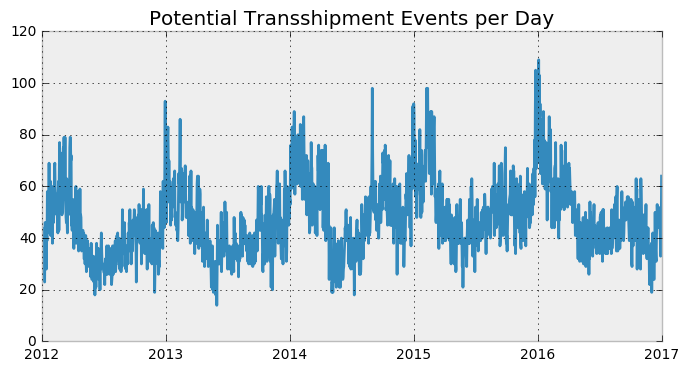

In [10]:
plt.rcParams["figure.figsize"] = [8,4]
plt.style.use('bmh')
plt.plot([i for i in range(numdays)], hours_per_day)
plt.title("Potential Transshipment Events per Day")
years = [2012,2013,2014,2015, 2016,2017]
labels = [int(i) for i in years]
x = [i*365 for i in range(6)]
plt.xlim(0,365*5+1)
plt.xticks(x, labels)
plt.show()

In [11]:
hours_per_week = np.zeros(numdays/7)

# There are more efficient ways to do this
for index, row in df.iterrows():
    lat = int(math.floor(row['latitude']*one_over_cellsize))
    d = row['event_start_time']
    d = datetime.strptime(d,"%Y-%m-%d %H:%M:%S UTC")
    day_index = (d - d0).days/7
    try:
        hours_per_week[day_index] += 1 #770
    except:
        pass

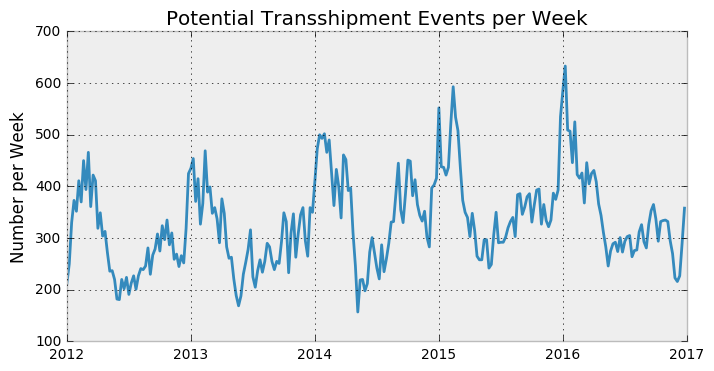

In [12]:
plt.rcParams["figure.figsize"] = [8,4]
plt.style.use('bmh')
plt.plot([i for i in range(numdays/7)], hours_per_week)
plt.title("Potential Transshipment Events per Week")
years = [2012,2013,2014,2015, 2016,2017]
labels = [int(i) for i in years]
x = [i*365/7 for i in range(6)]
plt.xlim(0,(365*5+1)/7)
plt.xticks(x, labels)
plt.ylabel("Number per Week")
plt.show()

In [13]:
def get_area(lat):
    '''This function converts square degrees to square kilometers. 
    It is not exact, but it is close enough.'''
    lat_degree = 69 # miles
    # Convert latitude and longitude to 
    # spherical coordinates in radians.
    degrees_to_radians = math.pi/180.0        
    # phi = 90 - latitude
    phi = (math.fabs(lat)+cellsize/2.)*degrees_to_radians #plus half a cell size to get the middle
    lon_degree = math.cos(phi)*lat_degree 
    return  lat_degree*lon_degree* 2.59 # square miles to square km

In [14]:
grid = np.zeros(shape=(12,numlats,numlons))

for index, row in df.iterrows():
    lat = int(math.floor(row['latitude']*one_over_cellsize))
    lon = int(math.floor(row['longitude']*one_over_cellsize))
    d = row['event_start_time']
    d = datetime.strptime(d,"%Y-%m-%d %H:%M:%S UTC")
    if d > datetime(2016,1,1):
        m = d.month-1
        lat_index = lat-min_lat*one_over_cellsize 
        lon_index = lon-min_lon*one_over_cellsize
        area = get_area(lat*cellsize)*cellsize*cellsize # lat*cellsize is the latitude, 
        try:
            grid[m][lat_index][lon_index] += float(row['duration_hrs'])/area #/770
        except:
            pass



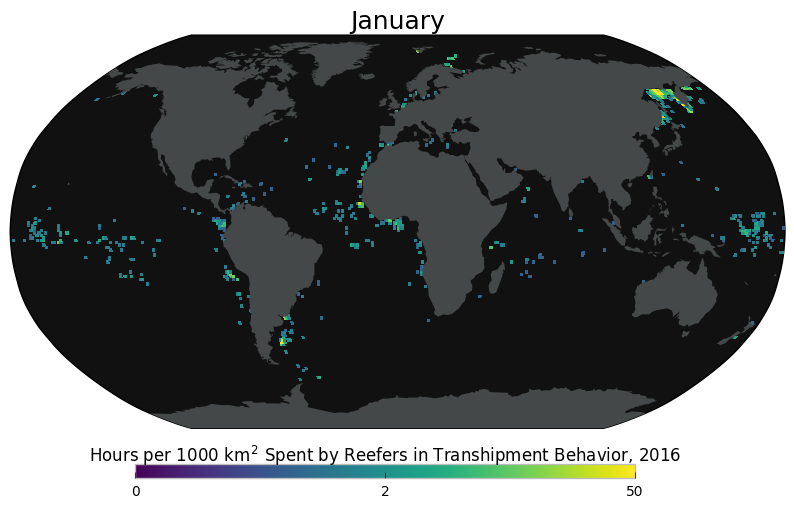

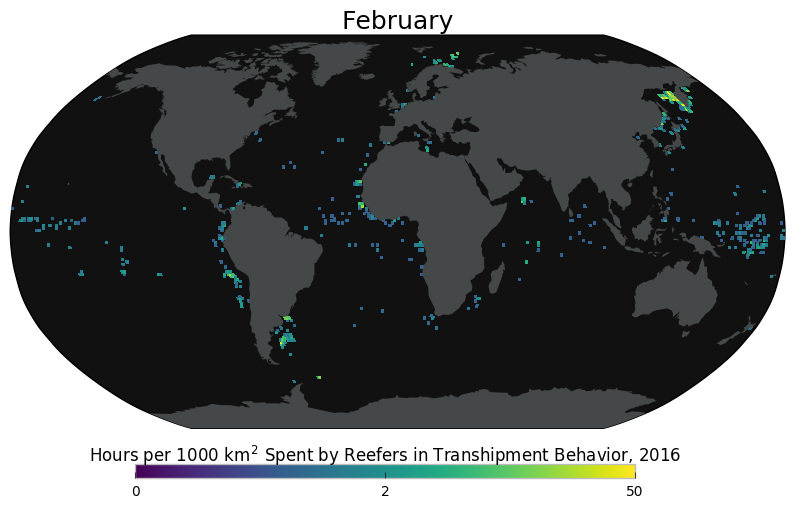

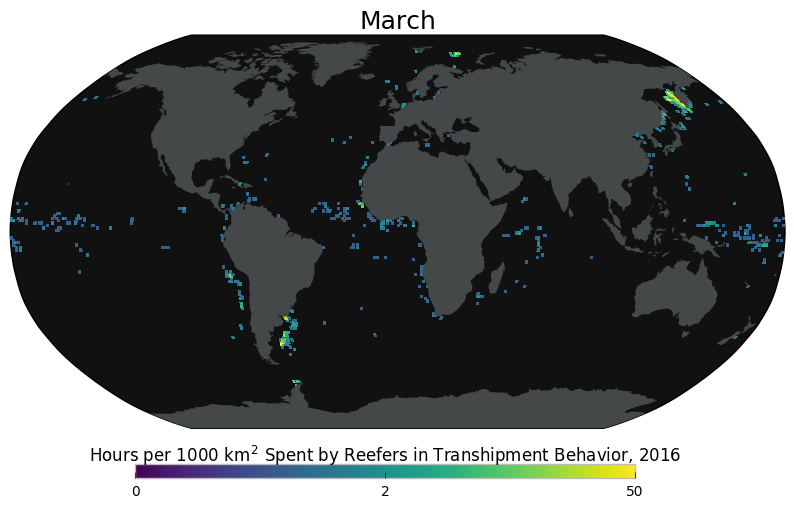

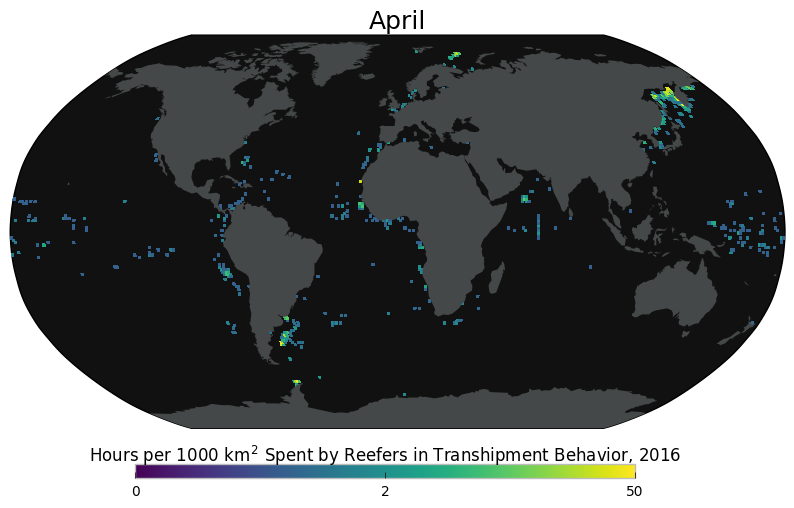

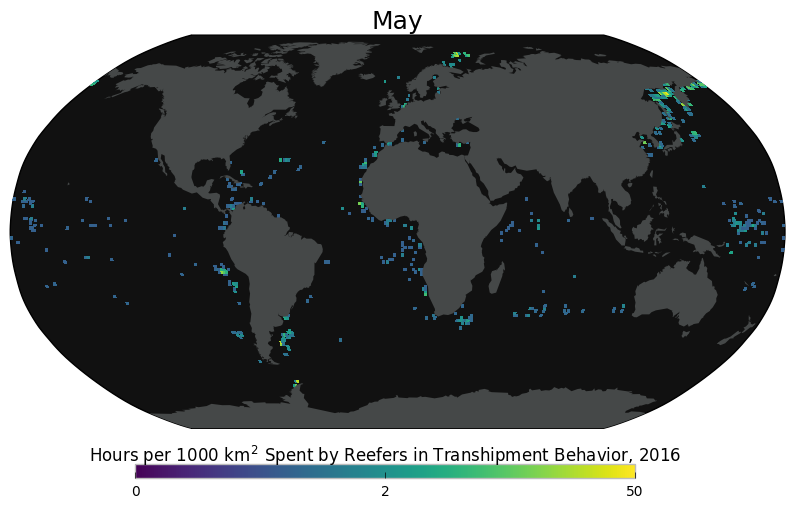

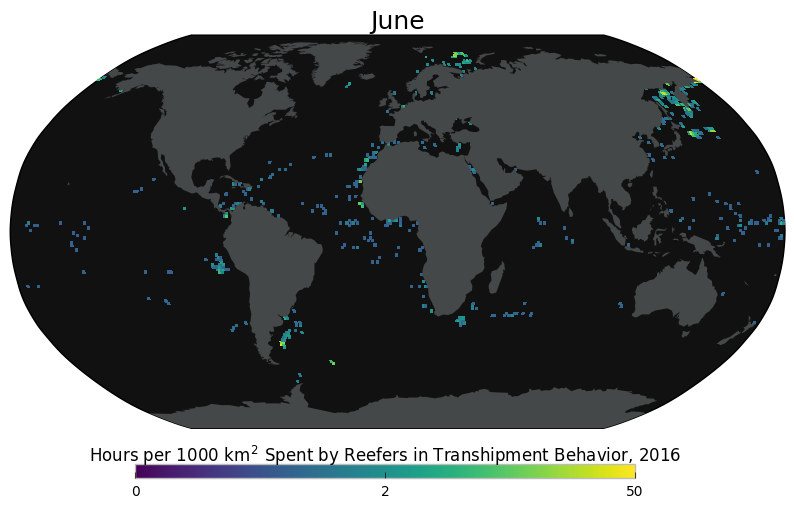

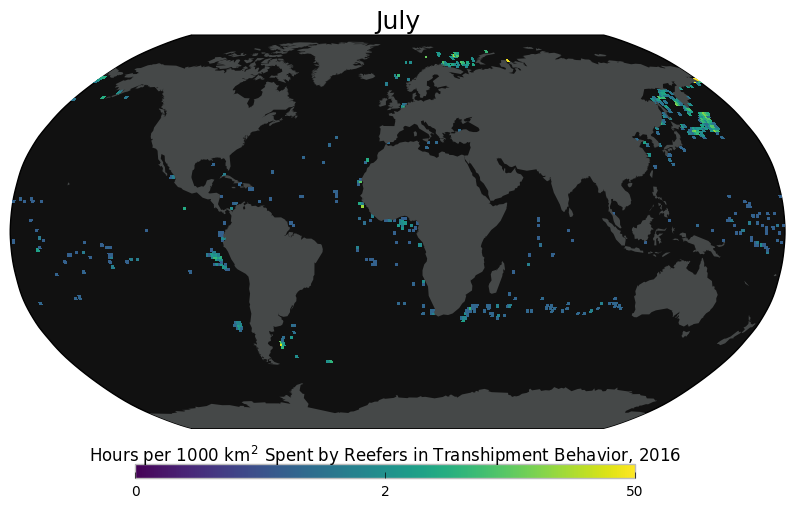

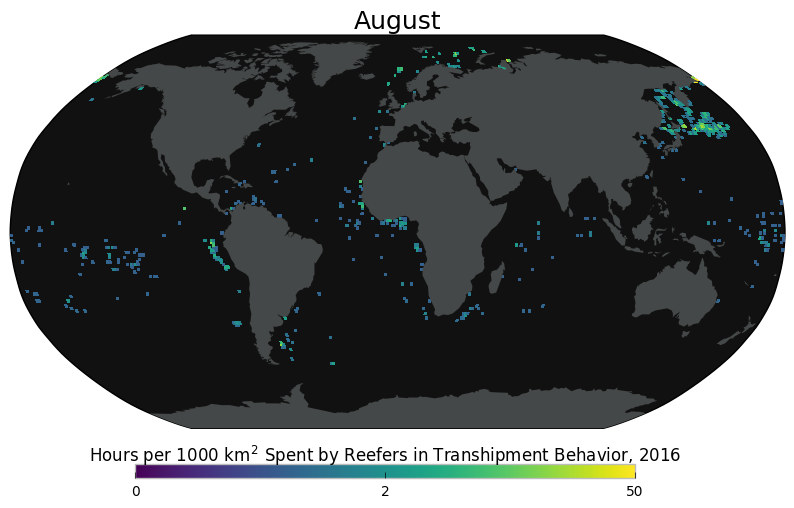

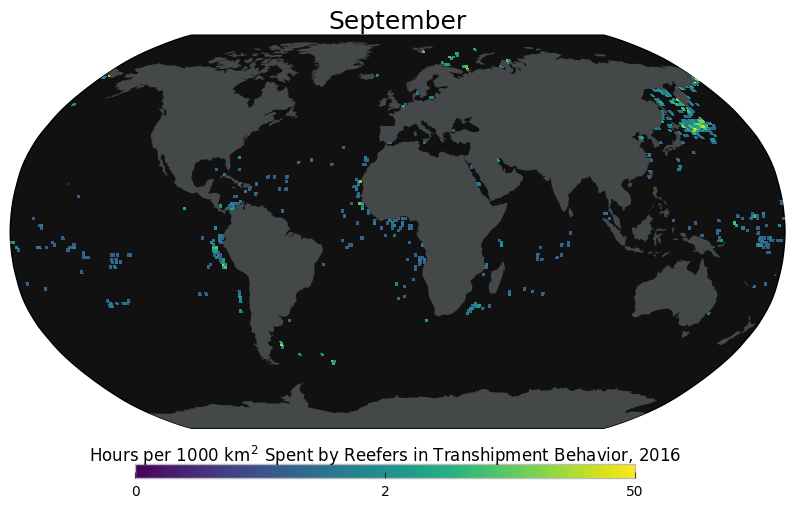

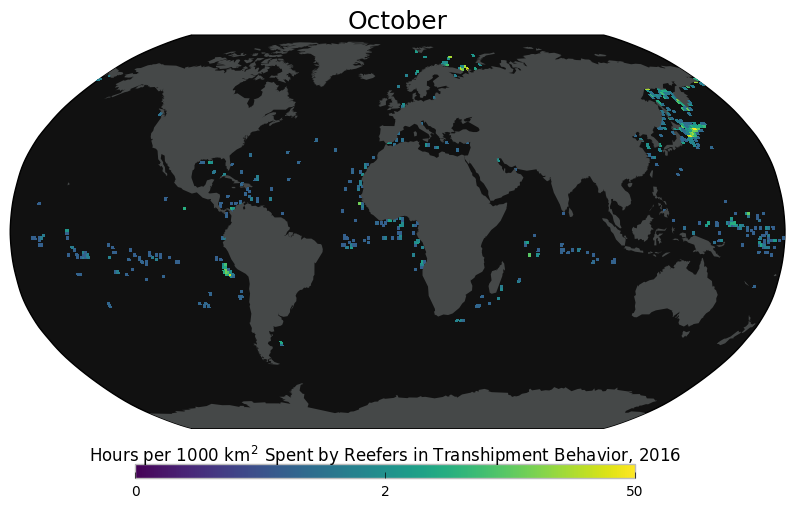

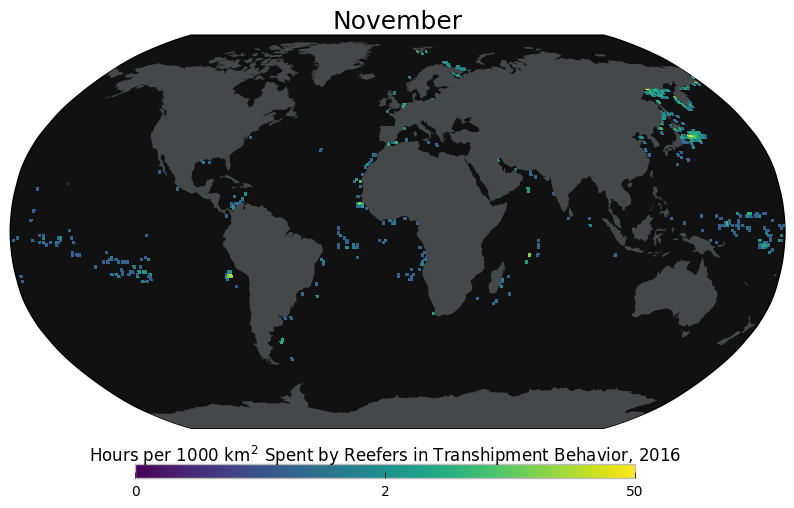

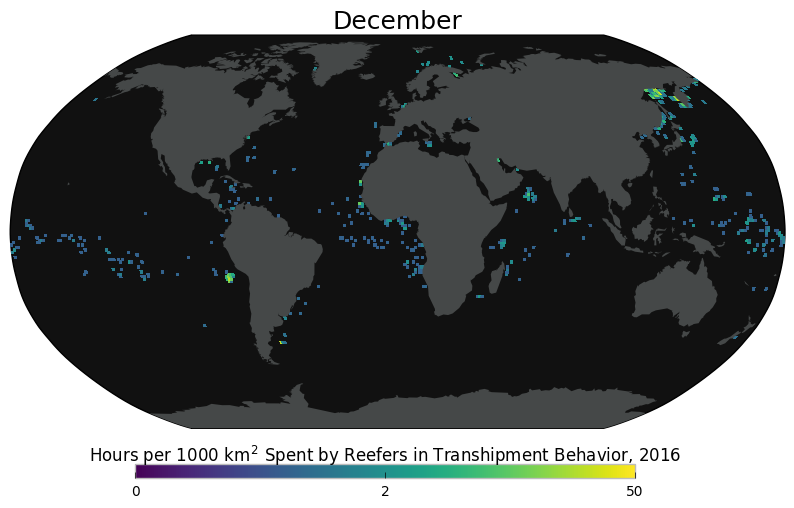

In [15]:
plt.rcParams["figure.figsize"] = [10,7]
import calendar


for month in range(12):
    month_name = calendar.month_name[month+1]
    title = "{}".format(month_name)

    fig = plt.figure()

    fig_min_value = .1
    fig_max_value = 50.1
    x = np.linspace(firstlon, lastlon, -(firstlon-lastlon)*one_over_cellsize+1)
    y = np.linspace(lastlat, firstlat, (firstlat-lastlat)*one_over_cellsize+1)
    x, y = np.meshgrid(x, y)
    lat_boxes = np.linspace(lastlat,firstlat,num=numlats,endpoint=False)
    lon_boxes = np.linspace(firstlon,lastlon,num=numlons,endpoint=False)

    m = Basemap(projection='robin',lon_0=0,resolution='c')
    m.drawmapboundary(fill_color='#111111')
    cont_color = '#454848'
    m.fillcontinents(cont_color,lake_color=cont_color )

    converted_x, converted_y = m(x, y)
    norm = colors.LogNorm(vmin=fig_min_value, vmax=fig_max_value)
    m.pcolormesh(converted_x, converted_y, grid[month,:,:]*1000, norm=norm, vmin=fig_min_value,
                 vmax=fig_max_value, cmap = plt.get_cmap('viridis'))
    plt.title(title, color = "#000000", fontsize=18)

    # legend
    ax = fig.add_axes([0.25, 0.16, 0.5, 0.02]) 
    norm = colors.LogNorm(vmin=fig_min_value, vmax=fig_max_value)
    lvls = np.logspace(np.log10(fig_min_value),np.log10(fig_max_value),num=3)
    cb = colorbar.ColorbarBase(ax,norm = norm, orientation='horizontal',ticks=lvls, 
                               cmap = plt.get_cmap('viridis')) 
    cb.ax.set_xticklabels([int(i) for i in lvls], fontsize=10, color = "#000000")
    cb.set_label('Hours per 1000 $\mathregular{km^{2}}$ Spent by Reefers in Transhipment Behavior, 2016',
                 labelpad=-40, y=0.45, color = "#000000", fontsize=12)
    plt.savefig('potential_transshipments_{}.png'.format(month+1),bbox_inches='tight',dpi=300,transparent=True,pad_inches=0)
    plt.show()